In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

2023-12-13 16:43:27.711325: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-13 16:43:28.256434: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 16:43:28.256509: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 16:43:28.342166: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 16:43:28.506901: I tensorflow/core/platform/cpu_feature_guar

Read Data

In [2]:
df = pd.read_csv("train.csv")
df.head(10)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180
5,6,DOGE,MID-SIZE,2.4,4.0,A6,X,8.85 km per L,29.40 MPG (AS),9.81 L/100km,216
6,7,BMV,COMPACT,2.0,unknown,M6,Z,NaN,8.10 liters per 100 km,32.87 mpg Imp.,201
7,8,LECUS,MID-SIZE,3.5,6.0,AS6,X,19.60 MPG (AS),10.10 km/L,21.28 MPG (AS),221
8,9,KIO,SUV - SMALL,2.4,4.0,AS6,X,13.90 liters per 100 km,NaN,NaN,243
9,10,TOYOTI,PICKUP TRUCK - SMALL,2.7,4.0,M5,X,7.63 km per L,8.90 L/100 km,not-available,297


In [3]:
df.columns

Index(['Id', 'Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City',
       'Fuel Consumption Hwy', 'Fuel Consumption Comb', 'CO2 Emissions(g/km)'],
      dtype='object')

In [4]:
for column in df.columns:
  print(df[column].unique())
  print(" ")
df.drop_duplicates(inplace=True)
len(df)

[    1     2     3 ... 54935 54936 54937]
 
['MITSU' 'TOYOTI' 'MATSUDA' 'CHEVO' 'DOGE' 'BMV' 'LECUS' 'KIO' 'FOLD'
 'JIPU' 'NIRRAN' 'CADILUXE' 'FOLKSWA' 'BARUSU' 'GONDA' 'LAND CRAWLER'
 'RYUNDAI' 'TOLVO' 'FIAR' 'ASURA' 'LAMBOGI']
 
['SUV - SMALL' 'PICKUP TRUCK - SMALL' 'COMPACT' 'VAN - PASSENGER'
 'MID-SIZE' 'SUV - STANDARD' 'STATION WAGON - SMALL' 'FULL-SIZE'
 'TWO-SEATER' 'PICKUP TRUCK - STANDARD' 'SUBCOMPACT' nan
 'STATION WAGON - MID-SIZE' 'MINICOMPACT' 'MINIVAN' 'not-available'
 'not-recorded' 'SPECIAL PURPOSE VEHICLE' 'missing' 'unestablished' 'na'
 'unknown' 'unspecified' 'VAN - CARGO']
 
['1.5' 'not-available' '2.0' 'unknown' '1.8' '2.4' '3.5' '2.7' '1.6' 'na'
 '1.2' '2.5' '3.2' '5.0' '8.4' '1.4' '3.8' 'unestablished' '6.2' nan '4.4'
 '3.0' '3.6' '5.7' '5.2' '6.4' '2.3' 'not-recorded' '3.3' '5.3' 'missing'
 '6.5' '1.0' '4.0' '3.7' '1.3' 'unspecified' '4.6' '4.8' '5.6' '2.8' '6.0'
 '4.2' '4.3' '2.2' '6.6' '5.4' '3.4' '5.8' '6.8']
 
['4.0' '6.0' '8.0' 'unknown' 'na' '3.0' '10.0' '

54937

Delete rows that contain invalid values such as NaN, -1, missing, unspecified, etc

In [5]:
def CleanData(df, col):
        del_index=df[
        (df[col]=='unspecified') | 
        (df[col]=='missing') | 
        (df[col]=='not-recorded') | 
        (df[col]=='not-available') |
        (df[col]=='-1') |
        (df[col]=='unknown') |
        (df[col]=='na') |
        (df[col]=='unestablished') | 
        (df[col]== np.nan) ].index
        df.drop(del_index, inplace=True)
        df.reset_index()    
        return df
col_clean=['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']
for col in col_clean:
        df=CleanData(df, col)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
len(df)

37656

Double check for null values

In [6]:
np.sum(df.isnull())

/home/vincentius/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Id                       0
Make                     0
Vehicle Class            0
Engine Size(L)           0
Cylinders                0
Transmission             0
Fuel Type                0
Fuel Consumption City    0
Fuel Consumption Hwy     0
Fuel Consumption Comb    0
CO2 Emissions(g/km)      0
dtype: int64

In [7]:
for column in df.columns:
  print(df[column].unique())
  print(" ")

[    1     3     5 ... 54935 54936 54937]
 
['MITSU' 'MATSUDA' 'TOYOTI' 'DOGE' 'LECUS' 'FOLD' 'KIO' 'JIPU' 'NIRRAN'
 'CADILUXE' 'BARUSU' 'GONDA' 'LAND CRAWLER' 'CHEVO' 'RYUNDAI' 'FOLKSWA'
 'BMV' 'TOLVO' 'FIAR' 'LAMBOGI' 'ASURA']
 
['SUV - SMALL' 'COMPACT' 'MID-SIZE' 'PICKUP TRUCK - SMALL'
 'SUV - STANDARD' 'STATION WAGON - SMALL' 'FULL-SIZE' 'TWO-SEATER'
 'PICKUP TRUCK - STANDARD' 'SUBCOMPACT' 'STATION WAGON - MID-SIZE'
 'MINICOMPACT' 'SPECIAL PURPOSE VEHICLE' 'MINIVAN' 'VAN - PASSENGER'
 'VAN - CARGO']
 
['1.5' '2.0' '1.8' '2.4' '3.5' '2.7' '1.6' '1.2' '2.5' '3.2' '5.0' '8.4'
 '1.4' '3.8' '4.4' '3.0' '6.2' '5.7' '5.2' '3.6' '6.4' '2.3' '3.3' '5.3'
 '6.5' '1.0' '4.0' '3.7' '1.3' '4.6' '4.8' '5.6' '2.8' '6.0' '4.2' '4.3'
 '6.6' '5.4' '3.4' '5.8' '6.8' '2.2']
 
['4.0' '6.0' '3.0' '8.0' '10.0' '12.0' '5.0']
 
['AV8' 'AS6' 'M6' 'A6' 'M5' 'A9' 'AS8' 'AV' 'AM6' 'AS9' 'AM7' 'AV7' 'AS10'
 'A8' 'AV6' 'AV10' 'AS5' 'M7' 'A10' 'A4' 'AS7' 'A5' 'AM8' 'AM9' 'A7']
 
['X' 'Z' 'E' 'D' 'N']
 
['8.40 km/L

Method to find unique units of fuel consumption

In [8]:
def is_float(num):
    try:
        float(num)
        return True
    except:
        return False
list_temp=[]

for record in df["Fuel Consumption City"]:
    try:
        list_word=record.split(" ", 1)
        list_temp.append(list_word[1])
    except:
        continue
for rec in set(list_temp):
    if(is_float(rec)):
        continue
    else:
        print(rec)

km/L
km per L
L/100 km
liters per 100 km
L/100km
MPG (AS)
mpg Imp.
L/10km


Convert every data unit into the same unit, L/100km

In [9]:
def convert_to_l_per_hundred_km(df):
    for col in ["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb"]:
        list_temp=[]
        for record in df[col]:
            try:
                list_word=record.split(" ", 1)
                if list_word[1]=="mpg Imp.":
                    list_temp.append(282.481/float(list_word[0]))
                elif list_word[1]=="liters per 100 km" or list_word[1]=="L/100 km" or list_word[1]=="L/100km":
                    list_temp.append(float(list_word[0]))
                elif list_word[1]=="km/L" or list_word[1]=="km per L":
                    list_temp.append(100/float(list_word[0]))
                elif list_word[1]=="L/10km":
                    list_temp.append(float(list_word[0])*10)
                elif list_word[1]=="MPG (AS)":
                    list_temp.append(235.214/float(list_word[0]))
            except:
                list_temp.append(0)
        df[col] = list_temp
    return df
    

In [10]:
df=convert_to_l_per_hundred_km(df)

In [11]:
df.head(10)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,11.904762,7.200000,9.800000,208
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,10.204082,7.299251,8.894238,170
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.100000,7.899357,8.010000,180
5,6,DOGE,MID-SIZE,2.4,4.0,A6,X,11.299435,8.000476,9.810000,216
7,8,LECUS,MID-SIZE,3.5,6.0,AS6,X,12.000714,9.900990,11.053289,221
9,10,TOYOTI,PICKUP TRUCK - SMALL,2.7,4.0,M5,X,13.106160,8.900000,0.000000,297
10,11,FOLD,SUV - STANDARD,3.5,6.0,AS6,X,16.000952,11.806375,14.100000,347
11,12,MATSUDA,SUV - SMALL,2.0,4.0,AS6,X,9.199632,8.799626,9.017133,192
12,13,KIO,SUV - SMALL,2.4,4.0,AS6,X,11.600928,8.000028,9.980000,237
13,14,JIPU,SUV - SMALL,2.4,4.0,A9,X,12.300000,9.400000,10.996447,235


Remove zero values

In [12]:
def remove_zeros(df, column_name=""):
  df = df[df[column_name] != 0]
  df.reset_index()
  return df

Delete outliers and zero values

In [13]:
#Removing Outliers
def remove_outliers(df, column_name=""):
  q1 = df[column_name].quantile(0.25)
  q3 = df[column_name].quantile(0.75)

  IQR = q3 - q1

  lower_limit = q1 - 1.5 * IQR
  upper_limit = q3 + 1.5 * IQR

  df = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)]
  df.reset_index()
  df=remove_zeros(df, column_name)
  return df


In [14]:
df = remove_outliers(df,"Fuel Consumption City")
df = remove_outliers(df,"Fuel Consumption Hwy")
df = remove_outliers(df,"Fuel Consumption Comb")

In [15]:
df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)"]].describe()


,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
count,34513.000000,34513.000000,34513.000000,34513.000000
mean,12.254674,8.875608,10.734145,242.299713
std,3.559130,1.892495,2.636927,64.256096
min,4.199836,4.500000,4.470049,96.000000
25%,9.800583,7.500000,8.809513,196.000000
50%,11.600000,8.500000,10.200000,230.000000
75%,14.700000,10.100000,12.630000,282.000000
max,23.003339,14.600497,18.376094,522.000000


In [16]:
# replace_value=[]
# columns=['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
#        'Fuel Type', 'Fuel Consumption City', 'Fuel Consumption Hwy',
#        'Fuel Consumption Comb']
# for col in columns:
#     try:
#         replace_value.append(np.mean(df[col]))
#     except:
#         print(col)
#         replace_value.append(df[col].mode()[0])
# print(replace_value)

In [17]:
df.dtypes

Id                         int64
Make                      object
Vehicle Class             object
Engine Size(L)            object
Cylinders                 object
Transmission              object
Fuel Type                 object
Fuel Consumption City    float64
Fuel Consumption Hwy     float64
Fuel Consumption Comb    float64
CO2 Emissions(g/km)        int64
dtype: object

Manual imputation

In [18]:
# df=pd.read_csv('train.csv')
# for col in ["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb"]:
#     list_temp=[]
#     for record in df[col]:
#         try:
#             list_word=record.split(" ", 1)
#             list_temp.append(convert_to_l_per_hundred_km(list_word[0], list_word[1]))
#         except:
#             list_temp.append(0)
#     df[col] = list_temp

# def FillData(df, col, value_for_replace):
#         wrong_index=df[
#         (df[col]=='unspecified') | 
#         (df[col]=='missing') | 
#         (df[col]=='not-recorded') | 
#         (df[col]=='not-available') |
#         (df[col]=='-1') |
#         (df[col]=='unknown') |
#         (df[col]=='na') |
#         (df[col]=='unestablished') |
#         (df[col]=='zero')].index
#         df.loc[wrong_index, col]=value_for_replace
#         df[col].fillna(value_for_replace, inplace=True)
#         print(df[col].unique())
#         return df
# col_clean=['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
#        'Fuel Type', 'Fuel Consumption City', 'Fuel Consumption Hwy',
#        'Fuel Consumption Comb']
# for i in range(len(col_clean)):
#         df=FillData(df, col_clean[i], replace_value[i])
# for column in df.columns:
#   print(df[column].unique())
#   print(" ")
# df.drop_duplicates(inplace=True)
# len(df)

In [19]:
np.sum(df.isnull())

/home/vincentius/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Id                       0
Make                     0
Vehicle Class            0
Engine Size(L)           0
Cylinders                0
Transmission             0
Fuel Type                0
Fuel Consumption City    0
Fuel Consumption Hwy     0
Fuel Consumption Comb    0
CO2 Emissions(g/km)      0
dtype: int64

In [20]:
df = remove_outliers(df,"Fuel Consumption City")
df = remove_outliers(df,"Fuel Consumption Hwy")
df = remove_outliers(df,"Fuel Consumption Comb")
df = remove_outliers(df,"CO2 Emissions(g/km)")

In [21]:
df.describe()

,Id,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
count,33612.000000,33612.000000,33612.000000,33612.000000,33612.000000
mean,27509.930650,12.087215,8.778545,10.598356,238.526032
std,15834.363797,3.424232,1.800443,2.523050,60.031828
min,1.000000,4.199836,4.500000,4.470049,96.000000
25%,13812.500000,9.800000,7.401925,8.780000,195.000000
50%,27618.500000,11.500000,8.400500,10.110000,228.000000
75%,41149.250000,14.400000,10.000000,12.400000,276.000000
max,54934.000000,22.003181,14.000000,18.003888,406.000000


Method to sort qualitative data based on their CO2 Consumption mean

In [22]:
def visualize_sorted_mean(df, column_name):
  cols=df[column_name].unique()
  avg=[np.average(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  median=[np.median(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  dict_col=dict(zip(cols, zip(avg, median)))
  dict_col=sorted(dict_col.items(), key=lambda item: item[1])

  fig, ax = plt.subplots(figsize=(7,10))
  bar_width = 0.4

  bar1 = ax.barh(np.arange(len(cols)), [dict_col[:][i][1][0] for i in range(len(dict_col))], height=bar_width, color='yellow', alpha=0.5, label='Average')
  bar2 = ax.barh(np.arange(len(cols)) + bar_width, [dict_col[:][i][1][1] for i in range(len(dict_col))], height=bar_width, color='orange', alpha=0.5, label='Median')

  ax.set_yticks(np.arange(len(cols)) + bar_width / 2)
  ax.set_yticklabels(dict_col)
  ax.set_xlabel('CO2 Emissions(g/km)')
  ax.set_ylabel(column_name)
  ax.set_title('Visualization of CO2 emissions by ' + column_name)
  ax.legend()

  plt.show()

def generate_dict(df, column_name):
  cols=df[column_name].unique()
  avg=[np.average(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  median=[np.median(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  dict_col=dict(zip(cols, zip(avg, median)))
  dict_col=sorted(dict_col.items(), key=lambda item: item[1])
  return dict_col, median

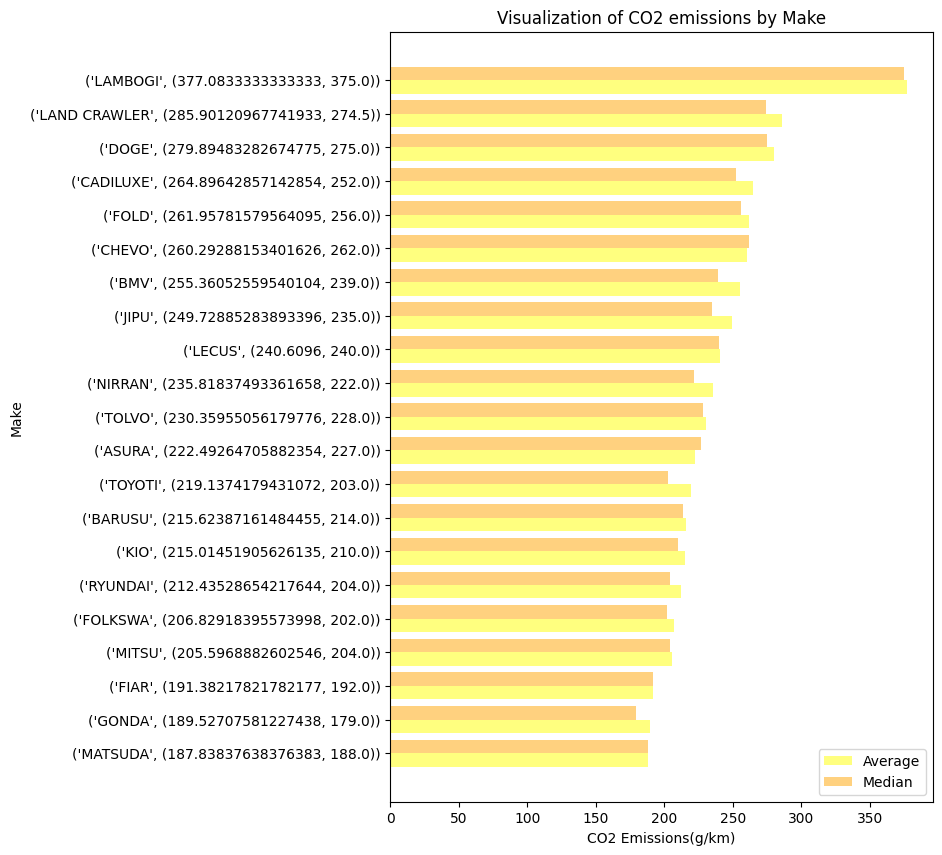

In [23]:
visualize_sorted_mean(df, "Make")

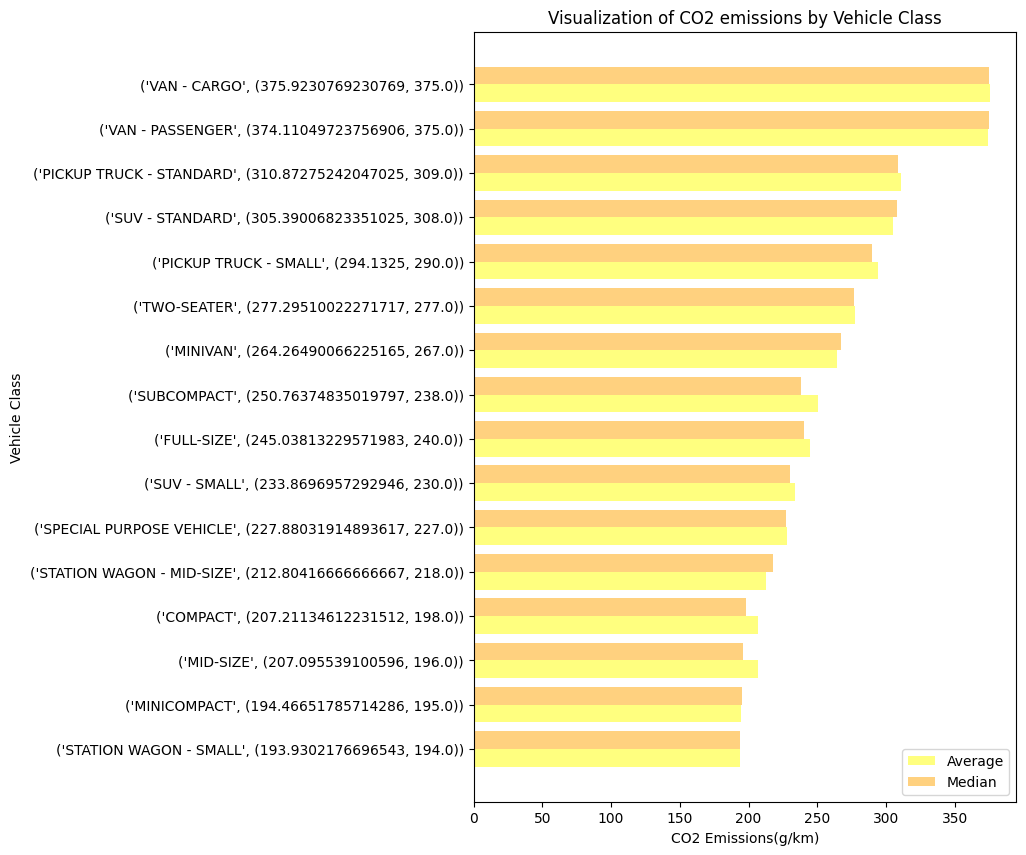

In [24]:
visualize_sorted_mean(df, "Vehicle Class")

Method to add new column (Average CO2 Consumption of each unique label)

In [25]:
def AddAvgColumn(df, column_name):
    make_map={}
    dict_col, avg=generate_dict(df, column_name)
    for i in range(len(dict_col)):
        make_map[dict_col[i][0]]=avg[i]
    new_col=column_name+"Avg"
    df[new_col]=df[column_name].map(make_map)
    # df[new_col] = (df[new_col]-df[new_col].min())/df[new_col].max()
    # df[new_col] = (df[new_col]-192.6185147143735)/271.26871156214463
    
    print(make_map)
    return df

In [26]:
df=AddAvgColumn(df, "Make")
df=AddAvgColumn(df, "Vehicle Class")
df=AddAvgColumn(df, "Transmission")
df=AddAvgColumn(df, "Fuel Type")

{'MATSUDA': 204.0, 'GONDA': 188.0, 'FIAR': 203.0, 'MITSU': 275.0, 'FOLKSWA': 240.0, 'RYUNDAI': 256.0, 'KIO': 210.0, 'BARUSU': 235.0, 'TOYOTI': 222.0, 'ASURA': 252.0, 'TOLVO': 214.0, 'NIRRAN': 179.0, 'LECUS': 274.5, 'JIPU': 262.0, 'BMV': 204.0, 'CHEVO': 202.0, 'FOLD': 192.0, 'CADILUXE': 239.0, 'DOGE': 228.0, 'LAND CRAWLER': 227.0, 'LAMBOGI': 375.0}
{'STATION WAGON - SMALL': 230.0, 'MINICOMPACT': 198.0, 'MID-SIZE': 196.0, 'COMPACT': 308.0, 'STATION WAGON - MID-SIZE': 194.0, 'SPECIAL PURPOSE VEHICLE': 240.0, 'SUV - SMALL': 277.0, 'FULL-SIZE': 309.0, 'SUBCOMPACT': 238.0, 'MINIVAN': 218.0, 'TWO-SEATER': 195.0, 'PICKUP TRUCK - SMALL': 290.0, 'SUV - STANDARD': 227.0, 'PICKUP TRUCK - STANDARD': 267.0, 'VAN - PASSENGER': 375.0, 'VAN - CARGO': 375.0}
{'AV': 212.5, 'AV10': 231.0, 'AV7': 213.0, 'AV6': 272.0, 'M5': 227.0, 'AM6': 235.0, 'AM8': 176.0, 'AV8': 178.0, 'M6': 192.0, 'A9': 243.0, 'AS6': 297.0, 'AS9': 182.0, 'A4': 294.0, 'AS8': 274.0, 'A6': 193.0, 'AM9': 183.5, 'AS5': 301.0, 'A8': 311.0, 'A

In [27]:
df.head(5)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),MakeAvg,Vehicle ClassAvg,TransmissionAvg,Fuel TypeAvg
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,11.904762,7.200000,9.800000,208,275.0,277.0,178.0,242.0
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,10.204082,7.299251,8.894238,170,204.0,308.0,297.0,242.0
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.100000,7.899357,8.010000,180,222.0,308.0,192.0,242.0
5,6,DOGE,MID-SIZE,2.4,4.0,A6,X,11.299435,8.000476,9.810000,216,228.0,196.0,193.0,242.0
7,8,LECUS,MID-SIZE,3.5,6.0,AS6,X,12.000714,9.900990,11.053289,221,274.5,196.0,297.0,242.0


In [28]:
print(df['MakeAvg'].unique())

[275.  204.  222.  228.  274.5 192.  210.  262.  179.  239.  235.  188.
 227.  202.  256.  240.  203.  214.  252.  375. ]


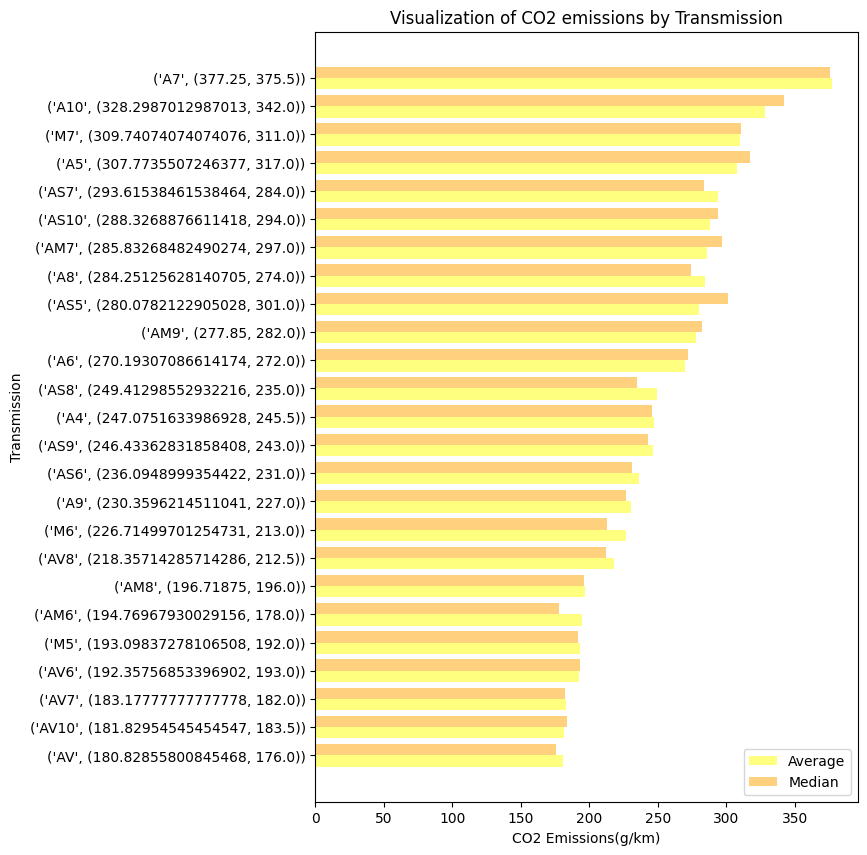

In [29]:
visualize_sorted_mean(df, "Transmission")


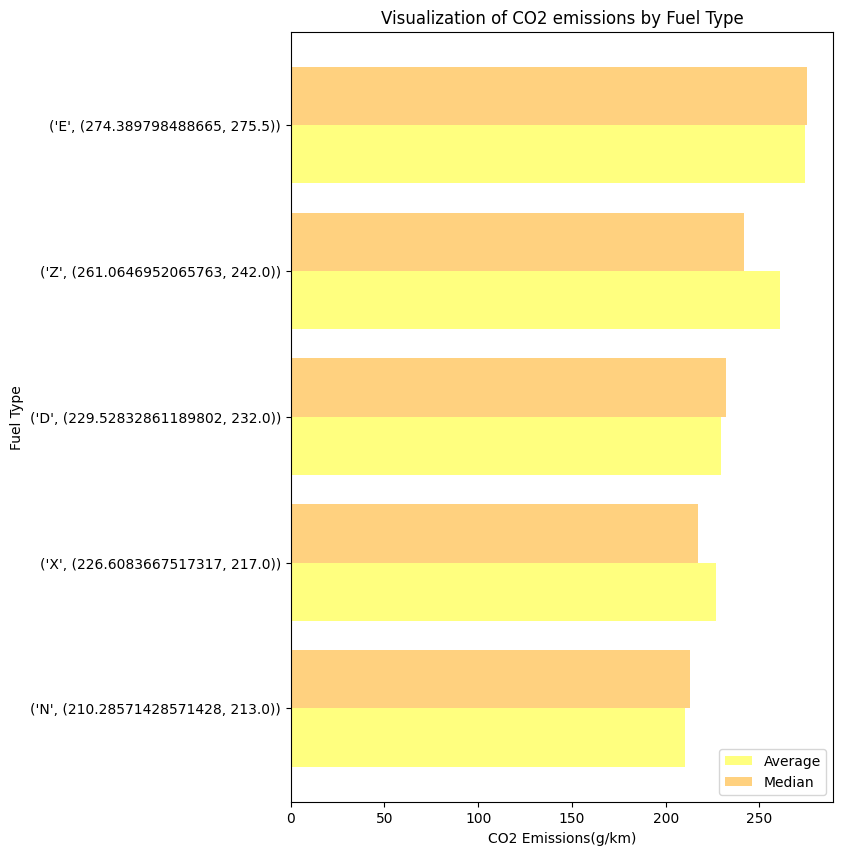

In [30]:
visualize_sorted_mean(df, "Fuel Type")


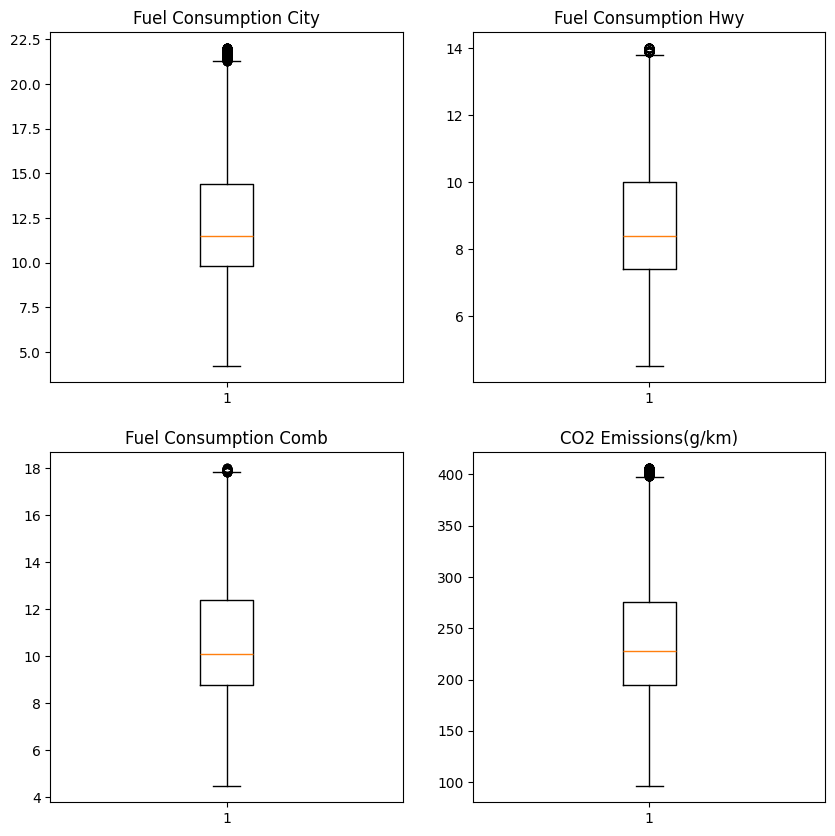

In [31]:
col_box=['Fuel Consumption City', 'Fuel Consumption Hwy','Fuel Consumption Comb', "CO2 Emissions(g/km)"]
plt.subplots(figsize=(10,10))
plt.delaxes()
i=1
for col in col_box:
    plt.subplot(2,2,i)
    plt.boxplot(df[col])
    plt.title(col)
    i+=1
plt.show()

In [32]:
#['X' 'E' 'Z' nan 'D' '-1' 'missing' 'unspecified' 'not-recorded' 'unknown', 'unestablished' 'na' 'not-available' 'N']
# len(df[df["Fuel Type"=="unknown"]])
df["Fuel Type"].value_counts()

Fuel Type
X    21944
Z     9367
E     1588
D      706
N        7
Name: count, dtype: int64

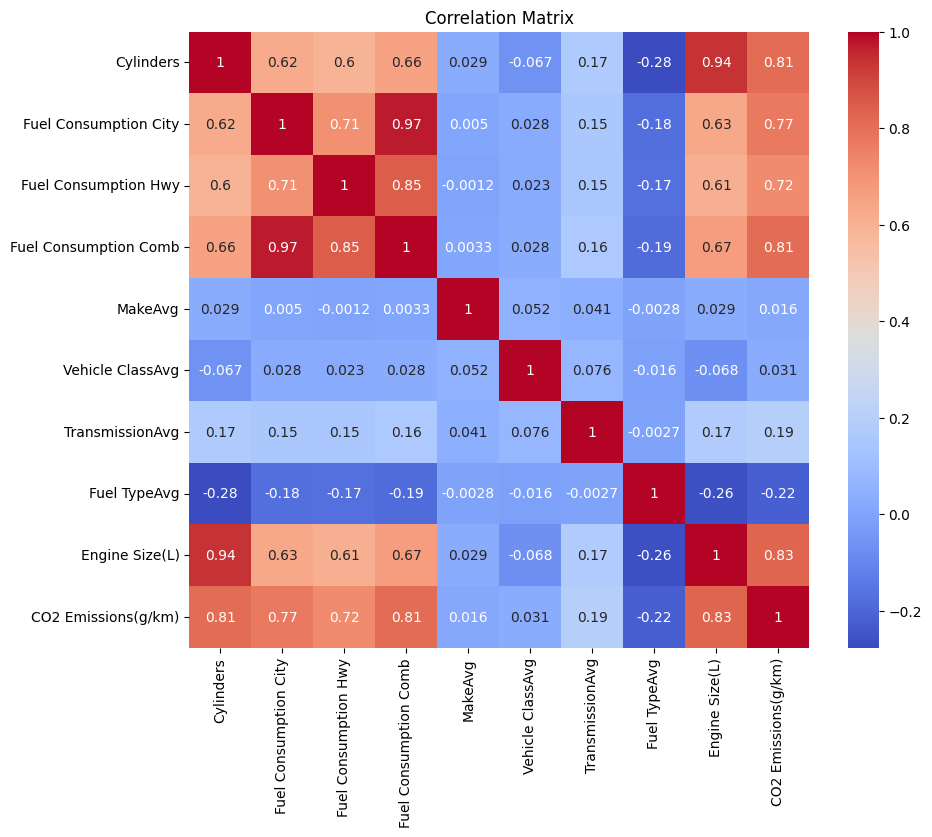

In [33]:
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "MakeAvg","Make",  "Cylinders", "Engine Size(L)"]].corr()
corr=df[['Cylinders', 'Fuel Consumption City', 'Fuel Consumption Hwy',
       'Fuel Consumption Comb', 'MakeAvg',
       'Vehicle ClassAvg', 'TransmissionAvg', 'Fuel TypeAvg', "Engine Size(L)", "CO2 Emissions(g/km)"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
df.columns

Index(['Id', 'Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City',
       'Fuel Consumption Hwy', 'Fuel Consumption Comb', 'CO2 Emissions(g/km)',
       'MakeAvg', 'Vehicle ClassAvg', 'TransmissionAvg', 'Fuel TypeAvg'],
      dtype='object')

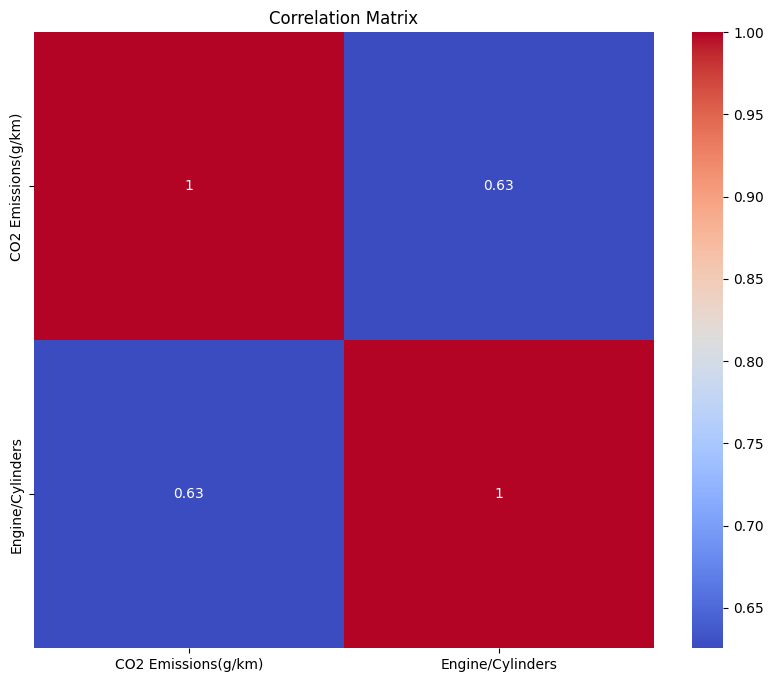

In [35]:
df["Engine/Cylinders"]=df["Engine Size(L)"].astype(float)/df["Cylinders"].astype(float)
corr=df[["CO2 Emissions(g/km)", "Engine/Cylinders"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
#ALT 1
# index_del=df[(df["Fuel Consumption City"].astype(float)<100) | (df["Fuel Consumption Hwy"].astype(float)<100) | (df["Fuel Consumption Comb"].astype(float)<100)].index
# df.drop(index_del, inplace=True)

In [37]:
#ALT 2
df["Fuel Consumption City"]=np.log10(df["Fuel Consumption City"])
df["Fuel Consumption Hwy"]=np.log10(df["Fuel Consumption Hwy"])
df["Fuel Consumption Comb"]=np.log10(df["Fuel Consumption Comb"])

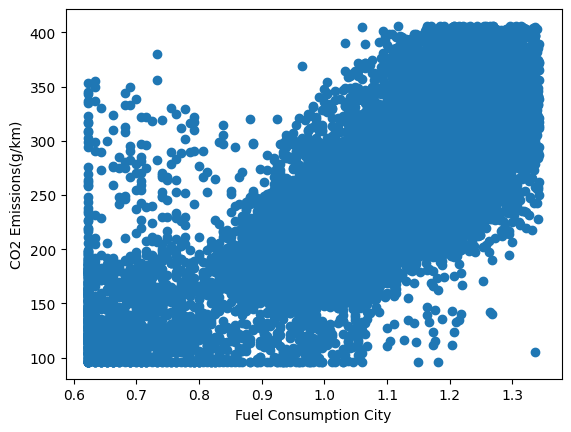

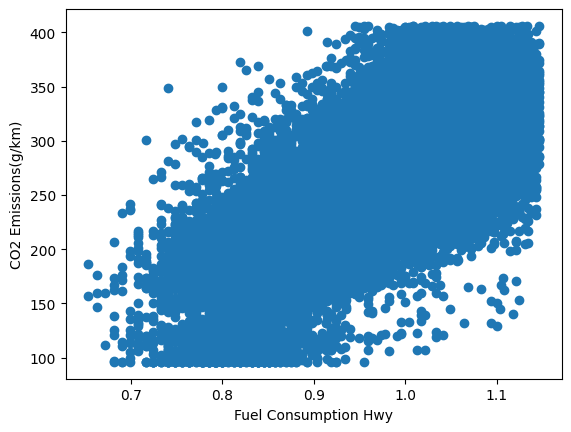

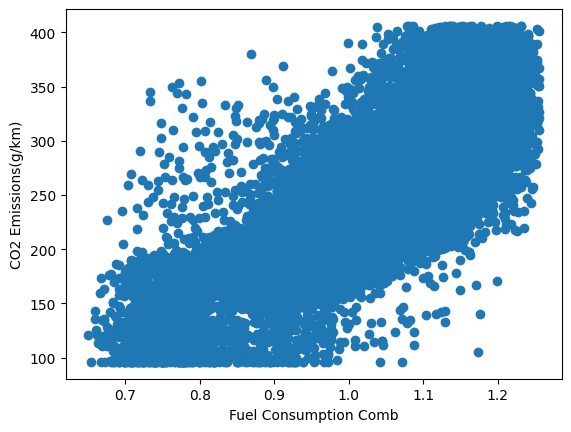

In [38]:
plt.scatter(df["Fuel Consumption City"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Fuel Consumption Hwy"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Fuel Consumption Comb"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "Make", "Cylinders", "Engine Size(L)"]].corr()

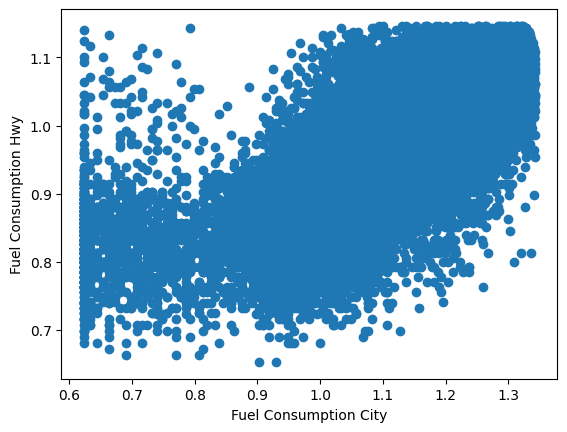

In [39]:
# del_index=df[(df["Fuel Consumption City"]>15000) | (df["Fuel Consumption Hwy"]>15000) | (df["Fuel Consumption Comb"]>800)].index
del_index=df[(df["Fuel Consumption City"]>15000000)].index
df.drop(del_index, inplace=True)
df.reset_index()
plt.scatter(df["Fuel Consumption City"], df["Fuel Consumption Hwy"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("Fuel Consumption Hwy")  
plt.show()

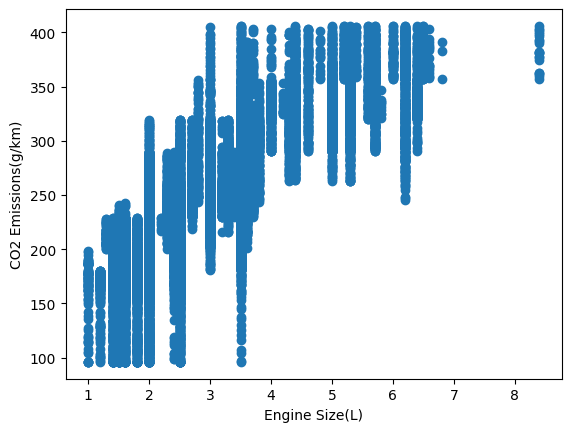

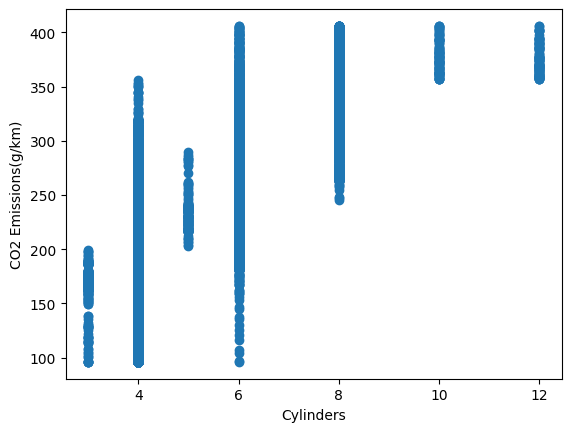

In [40]:
plt.scatter(df["Engine Size(L)"].astype(float), df["CO2 Emissions(g/km)"])
plt.xlabel("Engine Size(L)")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Cylinders"].astype(float), df["CO2 Emissions(g/km)"])
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "Make", "Cylinders", "Engine Size(L)"]].corr()

In [41]:
print(len(df))
df.to_csv("preprocessing.csv")

33612


In [42]:
df.head(20)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),MakeAvg,Vehicle ClassAvg,TransmissionAvg,Fuel TypeAvg,Engine/Cylinders
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,1.075721,0.857332,0.991226,208,275.0,277.0,178.0,242.0,0.375000
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,1.008774,0.863278,0.949109,170,204.0,308.0,297.0,242.0,0.500000
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,0.908485,0.897592,0.903633,180,222.0,308.0,192.0,242.0,0.450000
5,6,DOGE,MID-SIZE,2.4,4.0,A6,X,1.053057,0.903116,0.991669,216,228.0,196.0,193.0,242.0,0.600000
7,8,LECUS,MID-SIZE,3.5,6.0,AS6,X,1.079207,0.995679,1.043492,221,274.5,196.0,297.0,242.0,0.583333
10,11,FOLD,SUV - STANDARD,3.5,6.0,AS6,X,1.204146,1.072117,1.149219,347,192.0,227.0,297.0,242.0,0.583333
11,12,MATSUDA,SUV - SMALL,2.0,4.0,AS6,X,0.963770,0.944464,0.955068,192,204.0,277.0,297.0,242.0,0.500000
12,13,KIO,SUV - SMALL,2.4,4.0,AS6,X,1.064493,0.903092,0.999131,237,210.0,277.0,297.0,242.0,0.600000
13,14,JIPU,SUV - SMALL,2.4,4.0,A9,X,1.089905,0.973128,1.041252,235,262.0,277.0,243.0,242.0,0.600000
14,15,NIRRAN,STATION WAGON - SMALL,1.6,4.0,M6,Z,0.977724,0.880803,0.936514,198,179.0,230.0,192.0,232.0,0.400000


In [43]:
len(df)

33612

In [44]:
df_train = pd.read_csv("preprocessing.csv", index_col=0)
df_train.head(10)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),MakeAvg,Vehicle ClassAvg,TransmissionAvg,Fuel TypeAvg,Engine/Cylinders
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,1.075721,0.857332,0.991226,208,275.0,277.0,178.0,242.0,0.375000
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,1.008774,0.863278,0.949109,170,204.0,308.0,297.0,242.0,0.500000
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,0.908485,0.897592,0.903633,180,222.0,308.0,192.0,242.0,0.450000
5,6,DOGE,MID-SIZE,2.4,4.0,A6,X,1.053057,0.903116,0.991669,216,228.0,196.0,193.0,242.0,0.600000
7,8,LECUS,MID-SIZE,3.5,6.0,AS6,X,1.079207,0.995679,1.043492,221,274.5,196.0,297.0,242.0,0.583333
10,11,FOLD,SUV - STANDARD,3.5,6.0,AS6,X,1.204146,1.072117,1.149219,347,192.0,227.0,297.0,242.0,0.583333
11,12,MATSUDA,SUV - SMALL,2.0,4.0,AS6,X,0.963770,0.944464,0.955068,192,204.0,277.0,297.0,242.0,0.500000
12,13,KIO,SUV - SMALL,2.4,4.0,AS6,X,1.064493,0.903092,0.999131,237,210.0,277.0,297.0,242.0,0.600000
13,14,JIPU,SUV - SMALL,2.4,4.0,A9,X,1.089905,0.973128,1.041252,235,262.0,277.0,243.0,242.0,0.600000
14,15,NIRRAN,STATION WAGON - SMALL,1.6,4.0,M6,Z,0.977724,0.880803,0.936514,198,179.0,230.0,192.0,232.0,0.400000


In [45]:
df_train.columns

Index(['Id', 'Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City',
       'Fuel Consumption Hwy', 'Fuel Consumption Comb', 'CO2 Emissions(g/km)',
       'MakeAvg', 'Vehicle ClassAvg', 'TransmissionAvg', 'Fuel TypeAvg',
       'Engine/Cylinders'],
      dtype='object')

In [48]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    #tf.keras.layers.Dense(6, activation="relu"),
    #tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])
# col_train=['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
#        'Fuel Type', 'Fuel Consumption City', 'Fuel Consumption Hwy',
#        'Fuel Consumption Comb', 'CO2 Emissions(g/km)', 'MakeAvg',
#        'Vehicle ClassAvg', 'TransmissionAvg', 'Fuel TypeAvg']
col_train=[
       'Fuel Consumption Comb', "Engine Size(L)", "Fuel TypeAvg"]

# model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=tf.keras.metrics.RootMeanSquaredError())
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(5e-4), metrics=tf.keras.metrics.RootMeanSquaredError())

history=model.fit(df_train[col_train], df_train["CO2 Emissions(g/km)"], epochs=300, validation_split=0.2, shuffle=False)

Epoch 1/300
841/841 [==============================] - 6s 7ms/step - loss: 4027.3062 - root_mean_squared_error: 63.4611 - val_loss: 3945.4612 - val_root_mean_squared_error: 62.8129
Epoch 2/300
841/841 [==============================] - 3s 4ms/step - loss: 3973.8064 - root_mean_squared_error: 63.0381 - val_loss: 3898.0259 - val_root_mean_squared_error: 62.4342
Epoch 3/300
841/841 [==============================] - 3s 4ms/step - loss: 3926.0881 - root_mean_squared_error: 62.6585 - val_loss: 3850.4688 - val_root_mean_squared_error: 62.0521
Epoch 4/300
841/841 [==============================] - 3s 4ms/step - loss: 3878.4895 - root_mean_squared_error: 62.2775 - val_loss: 3803.1929 - val_root_mean_squared_error: 61.6700
Epoch 5/300
841/841 [==============================] - 3s 4ms/step - loss: 3831.2302 - root_mean_squared_error: 61.8969 - val_loss: 3756.3005 - val_root_mean_squared_error: 61.2887
Epoch 6/300
841/841 [==============================] - 3s 4ms/step - loss: 3784.3730 - root_mea

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(df_train[col_train], df_train["CO2 Emissions(g/km)"], test_size=0.2, random_state=42)


lr = LinearRegression(n_jobs=4)
lr.fit(x_train, y_train)
pred = lr.predict(x_valid)
score = mean_squared_error(y_valid, pred, squared=False)
print(score)

26.668446641543973


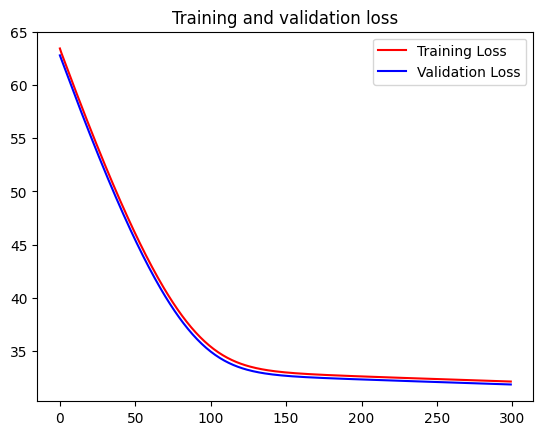

In [51]:
loss = np.sqrt(history.history['loss'])
val_loss = np.sqrt(history.history['val_loss'])

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [104]:
df_test = pd.read_csv("test.csv")
df_test=convert_to_l_per_hundred_km(df_test)
df_test.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,54938,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X,14.200000,15.200000,14.645953
1,54939,BMV,COMPACT,2.0,4.0,A8,Z,9.100000,6.499793,7.930344
2,54940,JIPU,SUV - SMALL,1.3,4.0,A9,X,10.201553,7.800000,9.120000
3,54941,LECUS,SUV - SMALL,not-recorded,4.0,AS6,Z,0.000000,8.899508,0.000000
4,54942,BARUSU,COMPACT,2.0,unestablished,M6,Z,8.802817,7.099296,8.040000


In [105]:
for col in df_test.columns:
    nan_index=df_test[(df_test[col]=='unspecified') | 
        (df_test[col]=='missing') | 
        (df_test[col]=='not-recorded') | 
        (df_test[col]=='not-available') |
        (df_test[col]=='-1') |
        (df_test[col]=='unknown') |
        (df_test[col]=='na') |
        (df_test[col]=='unestablished') | 
        (df_test[col]=='zero') | 
        (df_test[col]==-9999) | 
        (df_test[col]==-1) | 
        (df_test[col]== 0) | 
        (df_test[col]== np.nan) ].index
    df_test.loc[nan_index,col] = np.nan
# df_checknull=df_test[["Id", 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb']].isnull()
# df_checknull.drop_duplicates(inplace=True)
# print(len(df_checknull))
# # print(df_checknull.drop_duplicates())
# df_checknull.to_excel("Combination NULL.xlsx")
# nan_counts = df_test[["Id", 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']].isna().sum(axis=1)

# Filter rows with more than 3 NaN values
# result = df[nan_counts > 3]
# print(result)
    
# Fuel comp com, engine size cylinder, fuel type


mean_fuelComp = df['Fuel Consumption Comb'].mean()
mean_engineSize = df['Engine Size(L)'].astype(float).mean()
mean_cylinder = df['Cylinders'].astype(float).mean()
mode_value = df['Fuel Type'].mode().iloc[0]


df_test['Fuel Consumption Comb'].fillna(mean_fuelComp, inplace=True)
df_test['Engine Size(L)'].fillna(mean_engineSize, inplace=True)
df_test['Cylinders'].fillna(mean_cylinder, inplace=True)
df_test['Fuel Type'].fillna(mode_value, inplace=True)


# df_test['Engine Size(L)']=df_test['Engine Size(L)'].astype(float)
# df_test['Cylinders']=df_test['Cylinders'].astype(float)

     

In [106]:
print(df_test['Fuel Consumption Comb'].unique())
print(df_test['Engine Size(L)'].unique())
print(df_test['Cylinders'].unique())
print(df_test['Fuel Type'].unique())
print(df_test['Fuel Consumption Comb'].dtype)
print(df_test['Engine Size(L)'].dtype)
print(df_test['Cylinders'].dtype)
print(df_test['Fuel Type'].dtype)

[14.64595268  7.9303439   9.12       ... 12.9519028   7.56915863
 10.5147072 ]
['5.0' '2.0' '1.3' 2.8521093657027254 '6.2' '1.8' '4.4' '1.6' '2.4' '3.0'
 '1.4' '6.0' '5.2' '3.5' '3.3' '2.5' '2.3' '3.2' '3.6' '3.8' '1.0' '4.8'
 '2.8' '2.7' '5.6' '1.5' '5.3' '5.8' '6.6' '5.7' '6.4' '8.4' '4.6' '5.4'
 '3.7' '4.0' '1.2' '4.3' '6.5' '3.4' '6.8' '2.2' '4.2']
['8.0' '4.0' 5.141526835653933 '10.0' '6.0' '3.0' '12.0' '5.0']
['X' 'Z' 'D' 'E' 'N']
float64
object
object
object


In [107]:
np.sum(df_test.isnull())

/home/vincentius/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Id                          0
Make                        0
Vehicle Class             863
Engine Size(L)              0
Cylinders                   0
Transmission              613
Fuel Type                   0
Fuel Consumption City    1041
Fuel Consumption Hwy     1067
Fuel Consumption Comb       0
dtype: int64

In [108]:
fuel_dict = dict(zip(df["Fuel Type"], df["Fuel TypeAvg"]))
df_test["Fuel TypeAvg"] = df_test["Fuel Type"].map(fuel_dict)

In [109]:

prediction=model.predict(np.expand_dims(np.asarray(df_test[col_train]), -1).astype(np.float32))

736/736 [==============================] - 2s 3ms/step


In [ ]:
pred = lr.predict(np.array(df_test[col_train]))
df_out = pd.DataFrame(pred)
df_out.to_csv("output.csv")

c:\Users\Andreas Bayu P\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [110]:
df_test.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,Fuel TypeAvg
0,54938,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X,14.200000,15.200000,14.645953,242.0
1,54939,BMV,COMPACT,2.0,4.0,A8,Z,9.100000,6.499793,7.930344,232.0
2,54940,JIPU,SUV - SMALL,1.3,4.0,A9,X,10.201553,7.800000,9.120000,242.0
3,54941,LECUS,SUV - SMALL,2.852109,4.0,AS6,Z,NaN,8.899508,1.012891,232.0
4,54942,BARUSU,COMPACT,2.0,5.141527,M6,Z,8.802817,7.099296,8.040000,232.0


In [113]:
print(df_test["Id"].shape)
print(prediction.shape)

(23545,)
(23545, 1)


In [116]:
df_output=pd.DataFrame(df_test["Id"])
df_output=df_output.set_index("Id")
df_output["CO2 Emissions(g/km)"]=prediction
df_output.to_csv("output.csv")

In [64]:
print(len(df_test))

23545


In [72]:
df_test["Fuel TypeAvg"].unique()

array([242. ,   nan, 232. , 213. , 275.5, 217. ])